# SCRUBBING, CLEANING AND DATA ENGINEERING
 
## Objectives

The objective of this notebook will be to try to achieve the following main bullet points:

* Cast columns to appropriate data types
* Identify and deal with null values appropriately
* Remove unnecessary columns
* Perform data engineer when possible and necessary

It is started with the loading of all the necessary libraries. It might contain some that won't be used but it was done this way to try to be organized and to try to follow a sequence. If time permits it, I will go over the libraries and will erase any that has not been used.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import HeatMap

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# These two lines are to ingnore warnings that normally are within pink boxes

import warnings
warnings.filterwarnings('ignore')

The following is a short description of the libraries used:

<u>Pandas</u>: software library written for Python for data manipulation and analysis. In particular it offers data structures and operations for manipulating numerical tables and time series. 

<u>Numpy</u>: Library that provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays. Scipy is build on this, and provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications

<u>Matplotplib</u>: This is a comprehensive library for creating static, animated, and interactive visualization in Python. Matplotlib produces publication-quality figures in a variety of hardcopy formats and interactive environments across platforms

<u>Seaborn</u>: Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics

<u>Folium</u>: Library that makes it easy to visualize data that's been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map

Furthermore, the "%matplotlib inline" function has been activated which basically renders the figures in a notebook (instead of displaying a dump of the figure object), and the style of Seaborn plots has been preset to "darkgrid" (sns.set_style('darkgrid'))

With the key libraries loaded, the next step is to load the data to use as a dataframe (df). In this case the file is the "ks_house_data.csv". Once loaded a .head() and .tail() will be ran for a quick view of the first and last 5 rows of the dataframe

## Data Loading and Description 

In [3]:
df = pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns', 500) # Allows to display up to 500 columns
df.head().append(df.tail())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,3,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


Now we will proceed to verify the data type for each column with a basic .info():

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Data Cleaning and Engineering

With the .info() display, we can see the shape of the dataframe  (21 columns x  21597 rows). We can also see that there are three columns that have less values: waterfront, yr_renovated and view, and also that there are two columns with type "object" (date and sqft_basement)

Furthermore, the .isna().sum() add the missing values (NaN) per column. This is indicating that there are three columns that have missing values. The easies one to deal with is "view" as it only has 63, then the number are larger so I will have to go into more detail on each by doing .value_counts() or using other methods.

The "date" column will be the first one that I will be dealing with. I will convert that "date" into the datetime using Pandas and will engineer new separate columns for months and years which I will call "sale_month" and "sale_year" respectively. For each column that I work with I will add brief descriptions as this one so that it is easy to understand what I did and why I did it.

### date

In [6]:
# Engineering of two new columns from the date. The new columns as mentioned above will be:
# month_sale and year_sale

df.date = pd.to_datetime(df.date)

The next two code lines will be to create the new columns for month and year

In [7]:
df['month_sale'] = df['date'].dt.month
df['year_sale'] = df['date'].dt.year

We now check that the columns have been added:

In [8]:
df[['month_sale', 'year_sale']].head()

,month_sale,year_sale
0,10,2014
1,12,2014
2,2,2015
3,12,2014
4,2,2015


### view

In [9]:
# A quick value.count() will give me more information on this column:

df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

From the .value_counts() output it is quite interesting to see that 19422 of the total number of properties have no views (view=0). This represents a 89.99% of the data, which is high enough to decide on dropping the entire column. That 10%, most probably won't be having any impact on our model, therefore I will drop the entire column.

In [10]:
df.drop(columns = ['view'], inplace=True)

### waterfront

In [11]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

The value_counts is telling us that 19075 out of 19221 properties with data are not in the waterfront. This represents 99.2434%, leaving 0.7566% of the houses in the waterfront (less than 1%). Since we can't get that additional data, we will try to preserve that ratio with the remaining 2376 properties using the probability function below. If you do a simple mathematical calculation prior to running that code, you will realize that we will end up adding 19 houses to the waterfront and the remaining to inland. Lets see how that works out:

In [12]:
df['waterfront'].fillna("?", inplace=True)

wf_prob = [0.992434, .007566]
prob = [i/sum(wf_prob) for i in wf_prob]

def impute_waterfront(value):
    if value == "?":
        return np.random.choice([0.0, 1.0], p=prob)
    else:
        return value
    
df.waterfront = df.waterfront.map(lambda x: impute_waterfront(x))

A new value_counts() will tell us the new distribution of houses in the waterfront and inland and if the previous predictions that I made are correct or not:

In [13]:
df.waterfront.value_counts()

0.0    21429
1.0      168
Name: waterfront, dtype: int64

The predictions were right and the function worked well

### yr_renovated

In [14]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

The yr_renovated column has 17011 houses out of 17755 with data, with a 0 assigned suggesting no-renovation, which is equivalent to a 95.81%. Due to this high percentage I will convert the 3842 NaN values to 0. By doing this, the number of houses with '0' will increase to 20853 which represents a 96.5550% of the total houses. A good idea here might be also to create a category of houses renovated with a 1, and not renovated with a 0. This way it might be easier to see if there is any relationship between <b>renovation and price</b>

In [15]:
# First I will fill the NaN values with 0:

df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [16]:
# Now proceed to create thee new category with a for loop:

ren = []

for value in df['yr_renovated']:
    if value == 0:
        ren.append('0')
    else:
        ren.append('1')

df['renovation'] = ren

In [17]:
# A quick value.counts() will give us information about the new column:

df.renovation.value_counts()

0    20853
1      744
Name: renovation, dtype: int64

In [18]:
# The new column renovation has a dtype = object, so I will change it to a float64 as it has numbers in it
df['renovation'] = df['renovation'].astype(str).astype(int)

In [19]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,1


### sqft_basement

In [20]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
518.0         1
2730.0        1
1960.0        1
768.0         1
784.0         1
Name: sqft_basement, Length: 304, dtype: int64

On the second row we can see the str '?' present 454 times. We can also see that the large majority of the houses don't have a basement. Probably the best solution is to explore the mean and the median and use one of them to replace the '?' sign. However, if the number of 0.0 is too high we might decide to drop this column. Lets first  convert the '?' to a NaN, then calculate the mean and median and decide which one we will use to replace the NaN, and finally we will generate a histogram to better understand the distribution and decide what to do with the column:

In [21]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [22]:
df['sqft_basement'].agg(['median', 'mean'])

median      0.000000
mean      291.851724
Name: sqft_basement, dtype: float64

In [23]:
df['sqft_basement'].fillna(value=df['sqft_basement'].median(), inplace=True)

In [24]:
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

We have successfully replaced the '?' with 0 values now so lets see the histogram:

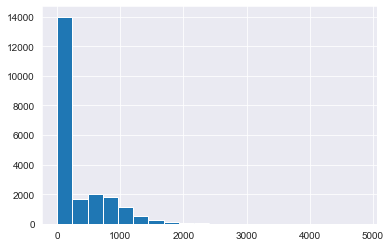

In [25]:
df['sqft_basement'].hist(bins=20)
plt.show()

The histogram clearly shows that the majority of the properties don't have a basement, therefore even after the effort to fix this column it might be better to drop the column. However, for the time being I will keep it and will make a decision after cleaning the rest of the dataframe. Maybe an alternative will be tto create a new category with a no_basement = 0 and basement = 1. 

For the time being the line to drop the column (next cell) will be commented, so if I decide to drop I can come back to this and deactivate the comment

In [26]:
#df.drop(columns = ['sqft_basement'], inplace=True)

### id

In [27]:
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [28]:
df.id.value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

It's interesting that we got 0 duplicates above, but when we look at the value_counts of the id column, we see numbers such as 3 and 2. So, clearly there are duplicates at least with the same id number. Lets see how many we are dealing with:

In [29]:
duplicates_id = df[df.duplicated('id')]
print(len(duplicates_id))

177


Lets check out a couple of those ID numbers and see what they are referring to:

In [30]:
df.loc[df.id == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation
17588,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,9,2014,0
17589,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,12,2014,0
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,3,2015,0


In [31]:
df.loc[df.id == 2019200220]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation
12942,2019200220,2014-09-23,160000.0,3,2.25,1470,8682,1.0,0.0,3,7,1160,310.0,1985,0.0,98003,47.2729,-122.299,1670,8359,9,2014,0
12943,2019200220,2015-02-26,269000.0,3,2.25,1470,8682,1.0,0.0,3,7,1160,310.0,1985,0.0,98003,47.2729,-122.299,1670,8359,2,2015,0


It seems as it is the same house that it has been sold more than once. Because I am trying in current market prices, I will preserve the latest price and will drop the others:

In [32]:
df = df.drop_duplicates('id',keep='last')

lets do another check at the value_counts() of the id column and then double check that the ones kept correspond to the most recent ones:

In [33]:
df.id.value_counts()

2911700010    1
5450300010    1
5104511600    1
1160000115    1
686530110     1
             ..
2115510470    1
2922701305    1
6071600370    1
526059224     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [34]:
df.loc[df.id == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,3,2015,0


In [35]:
df.loc[df.id == 2019200220]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation
12943,2019200220,2015-02-26,269000.0,3,2.25,1470,8682,1.0,0.0,3,7,1160,310.0,1985,0.0,98003,47.2729,-122.299,1670,8359,2,2015,0


Perfect, I have managed to keep the most recent sale price.

For our next step, At this point I'm not sure what other columns need cleaning, so I will do a .describe to look at the statistics of the entire dataframe, and that might give me other clues:

In [36]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007796,3.410784,7.662792,1791.170215,285.937021,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161,6.564006,2014.325257,0.034547
std,2.876761e+09,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.087955,0.650035,1.171971,828.692965,440.012962,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867,3.117845,0.468482,0.182634
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000,0.000000
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000,4.000000,2014.000000,0.000000
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000,6.000000,2014.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000,9.000000,2015.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000,1.000000


According to these numbers, there appears to be a house with 33 bedrooms. It seems odd so lets look in mor edetail at the bedroom column with a value_counts()

### bedrooms

In [37]:
df.bedrooms.value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Only 1 bedroom with 33 bedrooms and the next in teems of size has 11. Lets dig in more into that specific row:

In [38]:
df.loc[df['bedrooms'] >= 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation
8748,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0.0,3,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,8,2014,1
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0.0,3,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400,8,2014,0
15147,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0.0,4,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914,10,2014,0
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,6,2014,0
19239,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0.0,4,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745,12,2014,0


So there are 5 properties with 10 or more beedrooms, but the 33 bedroom one is the smallest in terms of sqft_living (1620) and it has only 1.75 bathrooms. If this was real the average size per room would be 49 square feet, which is still possible, but not convincing. However, less than 2 bathrooms for this number of bedrooms doesn't seem real. Therefore we decided to drop this row (15856)

In [39]:
df.drop(index=15856, inplace=True)

We check again the .value_counts() to see if it is gone:

In [40]:
df.bedrooms.value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

### zipcode

Without doing any of the proper analysis it is clear that the Zipcode will play a role on the price. Before any decisions are made I will need to find out how many zipcodes I'm dealing with:

In [41]:
df.zipcode.value_counts()

98103    599
98038    586
98115    576
98052    571
98117    548
        ... 
98102    104
98010     99
98024     79
98148     56
98039     49
Name: zipcode, Length: 70, dtype: int64

70 zipcodes seems like a lot of variable to work with, specially as zipcode is a categorical. I'll will create 2 sectors hoping that it will properly capture the price distribution, but I will first look at the distribution per zipcode to understand on a plot:

I will create a new dataframe with the mean value per zipcode and the zipcodes. This way I will be able to sort it for better visuals on the plot

In [42]:
# first I will need a function to calculate the mean price per zipcode:

def zipcode_mean(zipcode):
    
    zipcode_mean = []
    
    for value in zipcode:
        value = df[(df['zipcode'] == value)]
        zipcode_mean.append(value['price'].mean().astype(int))
    return (zipcode_mean)

In [43]:
# Now I will need to define those zipcodes and calculate their mean:

zipcodes = df['zipcode'].unique()

zipcode_mean = list(zipcode_mean(zipcodes))

In [44]:
# With the two previous I can now create my temporary dataframe for the plot purpose:

df_zip = pd.DataFrame([])
df_zip['zip_mean_price'] = zipcode_mean
df_zip['zipcodes'] = zipcodes

# Right away I will sort it based on the zip_mean_price and will display the first 5 rows

sort_zip_mean = df_zip.sort_values(by=['zip_mean_price']).reset_index(drop=True)
sort_zip_mean.head()

,zip_mean_price,zipcodes
0,234606,98002
1,242447,98168
2,253317,98032
3,282268,98001
4,288112,98148


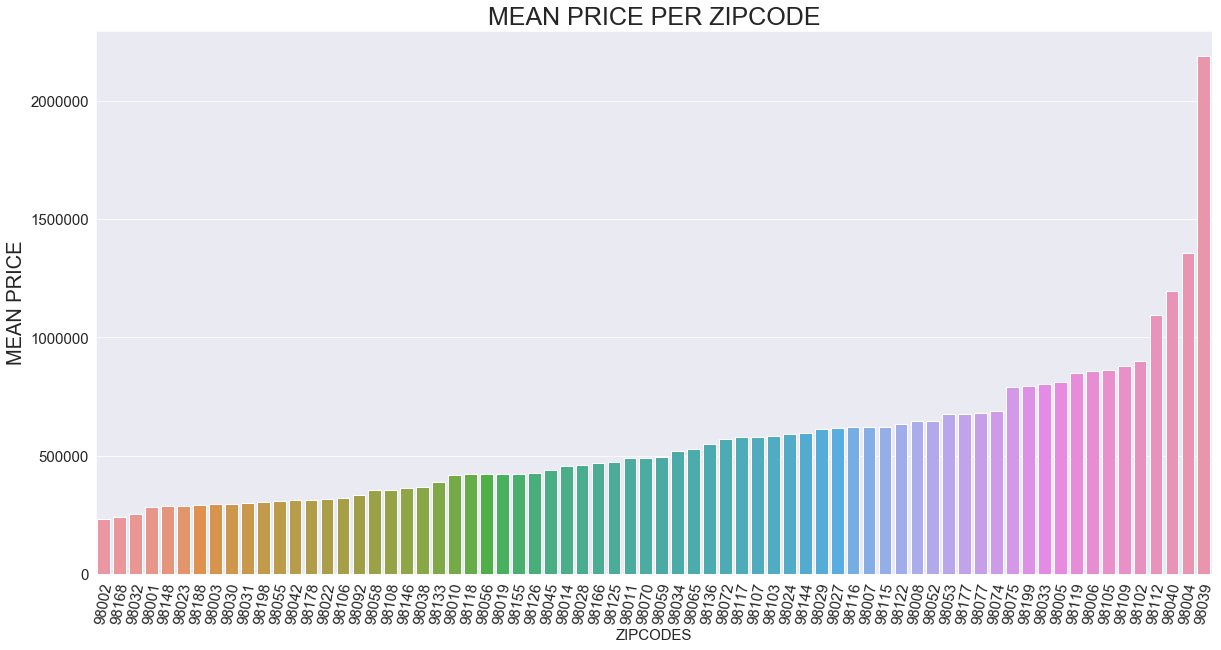

In [45]:
# And finally the bar plot

plt.figure(figsize=(20,10))
sns.barplot(x=sort_zip_mean['zipcodes'], y=sort_zip_mean['zip_mean_price'], order=sort_zip_mean['zipcodes'])
plt.xticks(rotation=80, fontsize=15)
plt.yticks(fontsize=15)
plt.title('MEAN PRICE PER ZIPCODE', fontsize=25)
plt.xlabel('ZIPCODES', fontsize=15)
plt.ylabel('MEAN PRICE',fontsize=20)
plt.show()

The plot illustrates how there are 4 zipcodes with mean price over 1 million $ and with one of those 4 where mean price is over 2 million, so way above what my clients will be able to buy

Probably the best way to deal with this will be to generate the 4 sections/quadrants. We will keep these zipcode column for the time being but probably it will be drop during the model tests

I will need to define the boundaries of each sector, so ideally I would like to isolate the property in the waterfront in one sector if possible and then the others would be define by this one. To find out those boundaries I need to plot the price value and color code it:

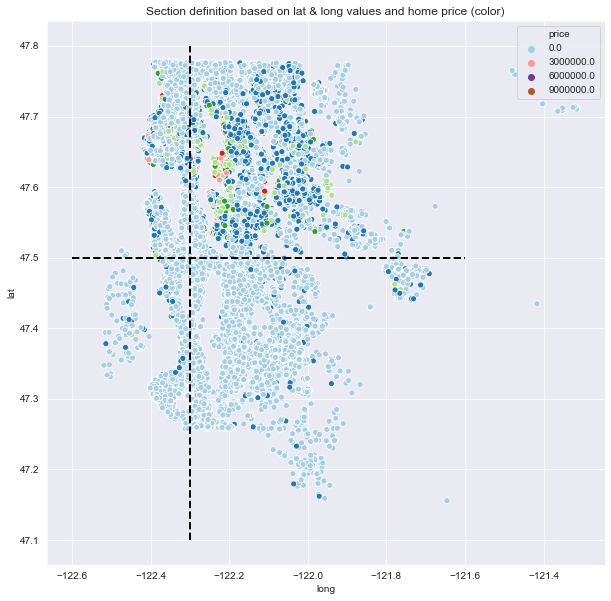

In [46]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='long', y='lat', hue='price', data=df, palette='Paired')
plt.hlines(y=47.5, xmin=-122.6, xmax=-121.6, colors='black', linestyle='--', lw=2)
plt.vlines(x=-122.3, ymin=47.1, ymax=47.8, colors='black', linestyle='--', lw=2)
plt.title('Section definition based on lat & long values and home price (color)')
plt.legend(fancybox=True);

The map above shows the 4 sectors/quadrants that I will be working with. The upper left corresponds to sector_1, then going in clockwise direction, sector_2 (upper_right), sector_3 (lower right), and sector_4 (lower left) respectively. This simple map already illustrated how being in sector_2 (in the waterfront) will increase the house price considerably with respect to the other sectors. 

In [47]:
# This plot is the same as the one above but will need some more cosmetics if I have the time. For the time being, I'll keep the one done by Abhineet

#df.plot(kind="scatter", x="long", y="lat", c="price", cmap=plt.get_cmap("tab20"), colorbar=True, alpha=0.6, figsize=(10,7))
#plt.hlines(y=47.5, xmin=-123.2, xmax=-121.4, colors='black', linestyle='-', lw=2)
#plt.show()


Lets proceed now to create the sections/quadrants:

In [48]:
df.loc[(df['lat'] >= 47.5 ) & (df['long'] < -122.3), "sector_1"] = 1
df.loc[(df['lat'] >= 47.5 ) & (df['long'] > -122.3), "sector_2"] = 1
df.loc[(df['lat'] < 47.5 ) & (df['long'] > -122.3), "sector_3"] = 1
df.loc[(df['lat'] < 47.5 ) & (df['long'] < -122.3), "sector_4"] = 1

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21596
Data columns (total 27 columns):
id               21419 non-null int64
date             21419 non-null datetime64[ns]
price            21419 non-null float64
bedrooms         21419 non-null int64
bathrooms        21419 non-null float64
sqft_living      21419 non-null int64
sqft_lot         21419 non-null int64
floors           21419 non-null float64
waterfront       21419 non-null float64
condition        21419 non-null int64
grade            21419 non-null int64
sqft_above       21419 non-null int64
sqft_basement    21419 non-null float64
yr_built         21419 non-null int64
yr_renovated     21419 non-null float64
zipcode          21419 non-null int64
lat              21419 non-null float64
long             21419 non-null float64
sqft_living15    21419 non-null int64
sqft_lot15       21419 non-null int64
month_sale       21419 non-null int64
year_sale        21419 non-null int64
renovation       21419 non-nul

In [50]:
df.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
month_sale           0
year_sale            0
renovation           0
sector_1         15688
sector_2         12350
sector_3         16512
sector_4         19817
dtype: int64

In [51]:
df.fillna(0, inplace=True)

In [52]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month_sale       0
year_sale        0
renovation       0
sector_1         0
sector_2         0
sector_3         0
sector_4         0
dtype: int64

In [53]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation,sector_1,sector_2,sector_3,sector_4
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014,0,0.0,1.0,0.0,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,1,1.0,0.0,0.0,0.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015,0,0.0,1.0,0.0,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014,0,1.0,0.0,0.0,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015,0,0.0,1.0,0.0,0.0


### grade 

To avoid working with 11 different home grades, I decided to bin them into 4 categories. The categories were chosen based on the plot below and they consist of the following ranges:

* Grade_A: from 3 to 5
* Grade_B: from 6 to 8
* Grade_C: from 9 to 11
* Grade_D: from 12 to 13

One advantage of doing this now is the reduction of the number of categoricals, as it is clear that this is in principle one

In [54]:
df.grade.value_counts()

7     8888
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

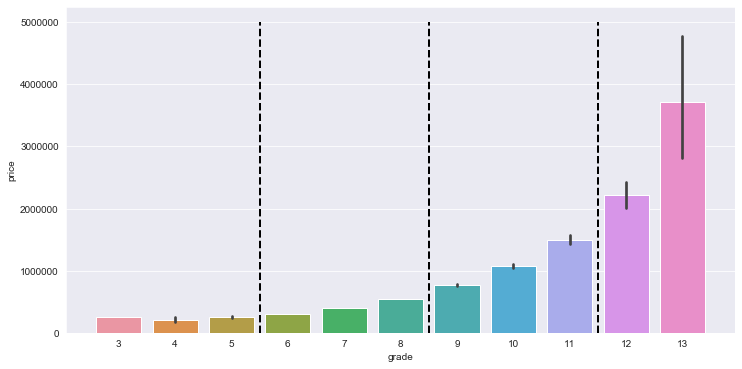

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(x="grade", y="price", data=df)
plt.vlines(x=2.5, ymin=0, ymax=5000000, colors='black', linestyle='--', lw=2)
plt.vlines(x=5.5, ymin=0, ymax=5000000, colors='black', linestyle='--', lw=2)
plt.vlines(x=8.5, ymin=0, ymax=5000000, colors='black', linestyle='--', lw=2)

In plot above the areas created by those dashed lines correspond to the new Grade_A, Grade_B, Grade_C, and Grade_D, from left to right respectively

In [56]:
df.loc[(df['grade'] >=  3) & (df['grade'] < 6), "Grade_A"] = 1
df.loc[(df['grade'] >= 6) & (df['grade'] < 9), "Grade_B"] = 1
df.loc[(df['grade'] >=  9) & (df['grade'] < 12), "Grade_C"] = 1
df.loc[(df['grade'] >= 12 ) & (df['grade'] <= 13), "Grade_D"] = 1

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21596
Data columns (total 31 columns):
id               21419 non-null int64
date             21419 non-null datetime64[ns]
price            21419 non-null float64
bedrooms         21419 non-null int64
bathrooms        21419 non-null float64
sqft_living      21419 non-null int64
sqft_lot         21419 non-null int64
floors           21419 non-null float64
waterfront       21419 non-null float64
condition        21419 non-null int64
grade            21419 non-null int64
sqft_above       21419 non-null int64
sqft_basement    21419 non-null float64
yr_built         21419 non-null int64
yr_renovated     21419 non-null float64
zipcode          21419 non-null int64
lat              21419 non-null float64
long             21419 non-null float64
sqft_living15    21419 non-null int64
sqft_lot15       21419 non-null int64
month_sale       21419 non-null int64
year_sale        21419 non-null int64
renovation       21419 non-nul

### yr_built 

One last column that I wanted to add is the age of the properties calculated based on the yr_built and today (2020:)

In [58]:
df_ha = df['yr_built'].apply(lambda x: 2020 - x)
df['home_age'] = df_ha

In [59]:
df.fillna(0, inplace=True)

In [60]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation,sector_1,sector_2,sector_3,sector_4,Grade_A,Grade_B,Grade_C,Grade_D,home_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,65
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,69
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,87
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,55
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,33


### price 

The price column is our target, so to start understanding it better I will calculate its .mean() and will create a  histogram to see its distribution:

In [61]:
df.price.mean().round(decimals=2)

541856.85

In [62]:
df.price.value_counts()

450000.0    172
350000.0    167
550000.0    157
500000.0    151
425000.0    149
           ... 
234975.0      1
804995.0      1
870515.0      1
336950.0      1
884744.0      1
Name: price, Length: 3595, dtype: int64

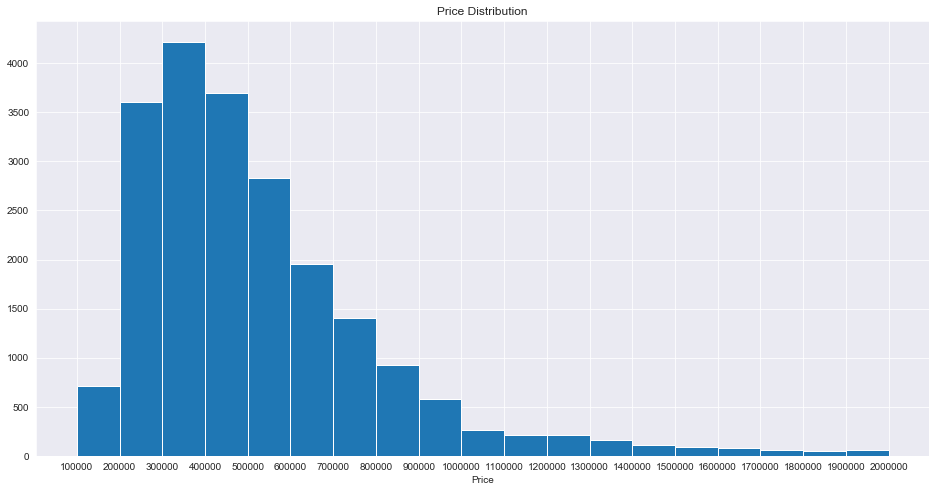

In [63]:
plt.figure(figsize=(16, 8))
bins = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]) * 1000
plt.hist(x=df['price'], bins=bins)
plt.xticks(bins)
plt.xlabel('Price')
plt.title('Price Distribution')
plt.show()

In [64]:
# Before any decision is made of cropping the data I will need to see what 
# percentage is below 1.1, 1.2, and 1.3 million $

l1 = len(df.loc[df['price'] <= 1100000])/len(df)
l2 = len(df.loc[df['price'] <= 1200000])/len(df)
l3 = len(df.loc[df['price'] <= 1300000])/len(df)

print('Percentage of data below 1.1 million $: {}'.format(l1))
print('Percentage of data below 1.2 million $: {}'.format(l2))
print('Percentage of data below 1.3 million $: {}'.format(l3))

Percentage of data below 1.1 million $: 0.9449554134179934
Percentage of data below 1.2 million $: 0.9546197301461319
Percentage of data below 1.3 million $: 0.9640972967925674


Basically every 100 thousand $ represents 1 %, so a reasonable number to start with, from my point of view would be 96.4%, but lets see first how many houses each of these percentages represent, how many are being left out, and if those numbers are good enough to consider the ones out of the range as outliers:


In [65]:
df_l1 = df.loc[df['price'] <= 1100000]
df_l2 = df.loc[df['price'] <= 1200000]
df_l3 = df.loc[df['price'] <= 1300000]

print('The number of houses with a threshold of 1.1 million$ is:')
print(len(df_l1), '- leaving out', 21419-len(df_l1))
print('------------------------------------------------------------')
print('The number of houses with a threshold of 1.2 million$ is:')
print(len(df_l2), '- leaving out', 21419-len(df_l2))
print('------------------------------------------------------------')
print('The number of houses with a threshold of 1.3 million$ is:')
print(len(df_l3), '- leaving out', 21419-len(df_l3))

The number of houses with a threshold of 1.1 million$ is:
20240 - leaving out 1179
------------------------------------------------------------
The number of houses with a threshold of 1.2 million$ is:
20447 - leaving out 972
------------------------------------------------------------
The number of houses with a threshold of 1.3 million$ is:
20650 - leaving out 769


There is quite a difference from my point of view. Every 100 thousand dollars that I include represents around 200 houses, so I will keep for my first run the threshold of 1.1 million dollars and depending on thee model results, I will make a final decision. 

So, now I will proceed to save this df as df_cleaned_1 to then use it to analise the categoricals and numerics, create dummies, and transform variables when needed.

Before that I will run a few quick tests for collinearity based on a correlation matrix and a heatmap and I will run a preliminary basemodel.

In [66]:
df_cleaned_1 = df.loc[df['price'] <= 1100000]
print(len(df_cleaned_1))

20240


In [67]:
df_cleaned_1.drop(['date', 'zipcode', 'grade'], axis=1, inplace=True)

# CHECKING FOR COLLINEARITY

In [68]:
df_cleaned_1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation,sector_1,sector_2,sector_3,sector_4,Grade_A,Grade_B,Grade_C,Grade_D,home_age
id,1.000000,0.008363,0.010588,0.022030,0.005691,-0.133340,0.028666,-0.008351,-0.025914,0.008814,-0.005046,0.024346,-0.013957,0.001903,0.019442,0.010197,-0.143183,-0.010350,0.007544,-0.013961,0.004754,0.025754,-0.047286,0.019330,-0.025267,0.002495,0.005355,-0.002169,-0.024346
price,0.008363,1.000000,0.300063,0.452300,0.618677,0.093582,0.270434,0.036707,0.034606,0.527416,0.228628,0.057338,0.081362,0.432423,0.071376,0.560416,0.082204,-0.010479,-0.001962,0.080979,0.083247,0.392985,-0.399826,-0.216224,-0.128094,-0.463061,0.516356,0.038084,-0.057338
bedrooms,0.010588,0.300063,1.000000,0.505143,0.602248,0.025661,0.159999,-0.024000,0.020563,0.478785,0.280208,0.166451,0.001058,-0.034435,0.146664,0.384407,0.022853,-0.001405,-0.008274,0.000803,-0.189478,0.137095,0.050871,-0.015100,-0.133306,-0.166517,0.212668,0.015518,-0.166451
bathrooms,0.022030,0.452300,0.505143,1.000000,0.716492,0.064710,0.501773,-0.007406,-0.139960,0.637793,0.215440,0.544707,0.022996,-0.011003,0.248697,0.528287,0.064760,0.010167,-0.031195,0.022569,-0.184389,0.183939,0.023908,-0.062690,-0.155485,-0.347152,0.405016,0.040943,-0.544707
sqft_living,0.005691,0.618677,0.602248,0.716492,1.000000,0.159103,0.338984,0.000348,-0.076173,0.853238,0.366731,0.353787,0.018362,0.008320,0.286985,0.737433,0.173210,0.016248,-0.034371,0.018162,-0.247977,0.248099,0.004216,-0.043059,-0.152054,-0.504448,0.565531,0.061336,-0.353787
sqft_lot,-0.133340,0.093582,0.025661,0.064710,0.159103,1.000000,-0.017602,0.031061,-0.002858,0.162367,0.011888,0.041871,0.007431,-0.094877,0.222392,0.142776,0.708722,0.002863,-0.000291,0.007530,-0.140272,0.018450,0.116767,0.016034,0.025670,-0.114950,0.110491,0.006239,-0.041871
floors,0.028666,0.270434,0.159999,0.501773,0.338984,-0.017602,1.000000,-0.008357,-0.281205,0.527477,-0.293541,0.511911,-0.004372,0.035787,0.135031,0.267348,-0.021803,0.015193,-0.023688,-0.004432,0.027799,0.048269,-0.010218,-0.115749,-0.083823,-0.288677,0.323749,0.009453,-0.511911
waterfront,-0.008351,0.036707,-0.024000,-0.007406,0.000348,0.031061,-0.008357,1.000000,0.005263,-0.008504,0.016718,-0.025851,0.042629,-0.043696,-0.042418,0.003094,0.032874,0.005542,-0.005474,0.042847,-0.028630,-0.021535,-0.012067,0.107083,0.022777,-0.004159,-0.002730,-0.000933,0.025851
condition,-0.025914,0.034606,0.020563,-0.139960,-0.076173,-0.002858,-0.281205,0.005263,1.000000,-0.181641,0.173987,-0.356477,-0.055112,-0.018858,-0.100538,-0.120637,0.001566,0.024183,-0.047742,-0.054711,0.031851,-0.043155,0.009434,0.008753,0.014370,0.137655,-0.146413,-0.005046,0.356477
sqft_above,0.008814,0.527416,0.478785,0.637793,0.853238,0.162367,0.527477,-0.008504,-0.181641,1.000000,-0.163522,0.462055,-0.003078,-0.045974,0.390506,0.717254,0.175772,0.013445,-0.028567,-0.003137,-0.301960,0.241318,0.075249,-0.052465,-0.125335,-0.552787,0.607059,0.063866,-0.462055


In [69]:
abs(df_cleaned_1.corr())>.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_sale,year_sale,renovation,sector_1,sector_2,sector_3,sector_4,Grade_A,Grade_B,Grade_C,Grade_D,home_age
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


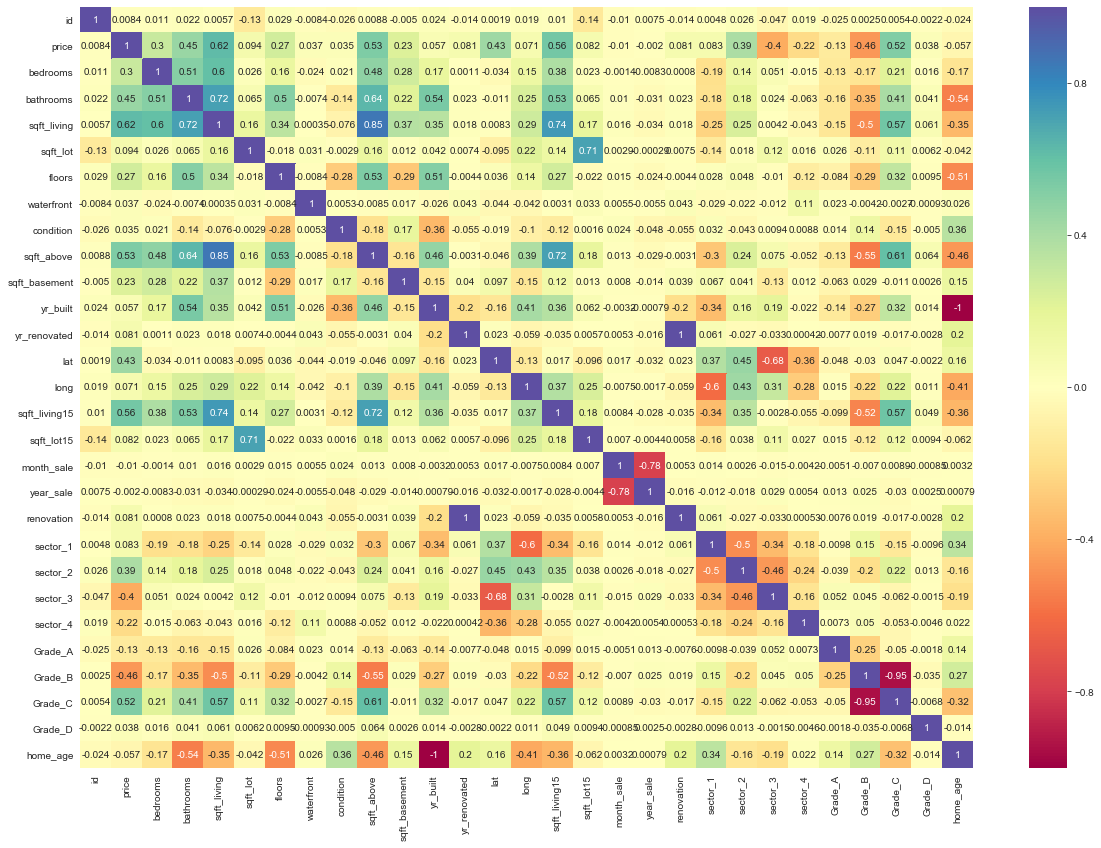

In [70]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(df_cleaned_1.corr(), center=0, cmap='Spectral', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.show()

In [71]:
df_cleaned_1.drop(['home_age', 'yr_renovated', 'month_sale', 'Grade_B', 'sqft_above'], axis=1, inplace=True)

==================================================================================================================

<b>Saving the cleaned and ready dataframe into a .csv file</b>:

In [72]:
df_cleaned_1.to_csv('df_cleaned_1.csv')

==================================================================================================================

## OBSERVATIONS

Based on the heatmap and its respective correlation coefficients, I can see collinearity within the following (assuming a threshold of > .75):
* sqrt_living and (bathrooms, grade, sqft_above and sqft_living15)
* sqrt_lot and sqrt_lot15
* month_sale and year_sale

If I remembere well multicollinearity is between three or more variables and the elast two that I listeed are only between 2, so I am not suree if this is a real statement yet....

COMMENTS:

I might consider running two models in parallel just to see thee impact of the variables causing the multicollinearity. SO maybe Model1 with limited number of variables, and Model2 with all variables. I will decide on this as I move forward

# BASE MODEL TEST

In [73]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

In [74]:
outcome = 'price'
x_cols = df_cleaned_1.drop(['price', 'id'], axis=1).columns
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

model = smf.ols(formula=formula, data=df_cleaned_1).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.698      
Dependent Variable:        price                  AIC:                      528571.5871
Date:                      2020-07-25 14:15       BIC:                      528753.6417
No. Observations:          20240                  Log-Likelihood:           -2.6426e+05
Df Model:                  22                     F-statistic:              2128.      
Df Residuals:              20217                  Prob (F-statistic):       0.00       
R-squared:                 0.698                  Scale:                    1.2845e+10 
---------------------------------------------------------------------------------------
                  Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
Intercept     -53321158.7260 3635873.0701 -14.6653 0.0000 -60447765.6558 -46194551.7962
bedrooms         -11702.6391    1191.4210  -9.8224 0.0000    -14037.9212     -9367.3570
bathrooms         32291.0300    1954.0542  16.5251 0.0000     28460.9249     36121.1352
sqft_living          95.3821       2.3646  40.3377 0.0000        90.7473       100.0168
sqft_lot              0.3027       0.0283  10.6937 0.0000         0.2472         0.3582
floors            26095.2542    2174.7266  11.9993 0.0000     21832.6131     30357.8953
waterfront       177278.8790   13597.3382  13.0378 0.0000    150626.9902    203930.7678
condition         32472.6579    1367.8213  23.7404 0.0000     29791.6169     35153.6989
sqft_basement        -7.8106       2.7053  -2.8872 0.0039       -13.1131        -2.5080
yr_built          -1116.2118      42.5283 -26.2463 0.0000     -1199.5707     -1032.8530
lat              159860.2279   10257.1697  15.5852 0.0000    139755.3412    179965.1147
long             -62749.9565    8832.0325  -7.1048 0.0000    -80061.4585    -45438.4544
sqft_living15        71.8252       2.1319  33.6902 0.0000        67.6465        76.0040
sqft_lot15           -0.1022       0.0433  -2.3607 0.0182        -0.1870        -0.0173
year_sale         19969.8158    1706.6846  11.7009 0.0000     16624.5752     23315.0563
renovation        47283.0030    4864.8845   9.7192 0.0000     37747.4337     56818.5723
sector_1          34952.6960   10941.7556   3.1944 0.0014     13505.9652     56399.4269
sector_2          24174.2908   10999.5004   2.1978 0.0280      2614.3753     45734.2062
sector_3        -121171.4746   11226.0469 -10.7938 0.0000   -143175.4396    -99167.5096
sector_4        -124701.4804   11446.8168 -10.8940 0.0000   -147138.1724   -102264.7885
Grade_A          -57936.9734    7253.6322  -7.9873 0.0000    -72154.6825    -43719.2644
Grade_C           99584.3825    2923.7115  34.0609 0.0000     93853.6702    105315.0948
Grade_D           60257.1646   50963.7224   1.1824 0.2371    -39635.8762    160150.2055
---------------------------------------------------------------------------------------
Omnibus:                   1572.394             Durbin-Watson:                1.988    
Prob(Omnibus):             0.000                Jarque-Bera (JB):             2829.387 
Skew:                      0.563                Prob(JB):                     0.000    
Kurtosis:                  4.444                Condition No.:                223683649
=======================================================================================
* The condition number is large (2e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [75]:
df_cleaned_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20240 entries, 0 to 21596
Data columns (total 24 columns):
id               20240 non-null int64
price            20240 non-null float64
bedrooms         20240 non-null int64
bathrooms        20240 non-null float64
sqft_living      20240 non-null int64
sqft_lot         20240 non-null int64
floors           20240 non-null float64
waterfront       20240 non-null float64
condition        20240 non-null int64
sqft_basement    20240 non-null float64
yr_built         20240 non-null int64
lat              20240 non-null float64
long             20240 non-null float64
sqft_living15    20240 non-null int64
sqft_lot15       20240 non-null int64
year_sale        20240 non-null int64
renovation       20240 non-null int64
sector_1         20240 non-null float64
sector_2         20240 non-null float64
sector_3         20240 non-null float64
sector_4         20240 non-null float64
Grade_A          20240 non-null float64
Grade_C          20240 non-null

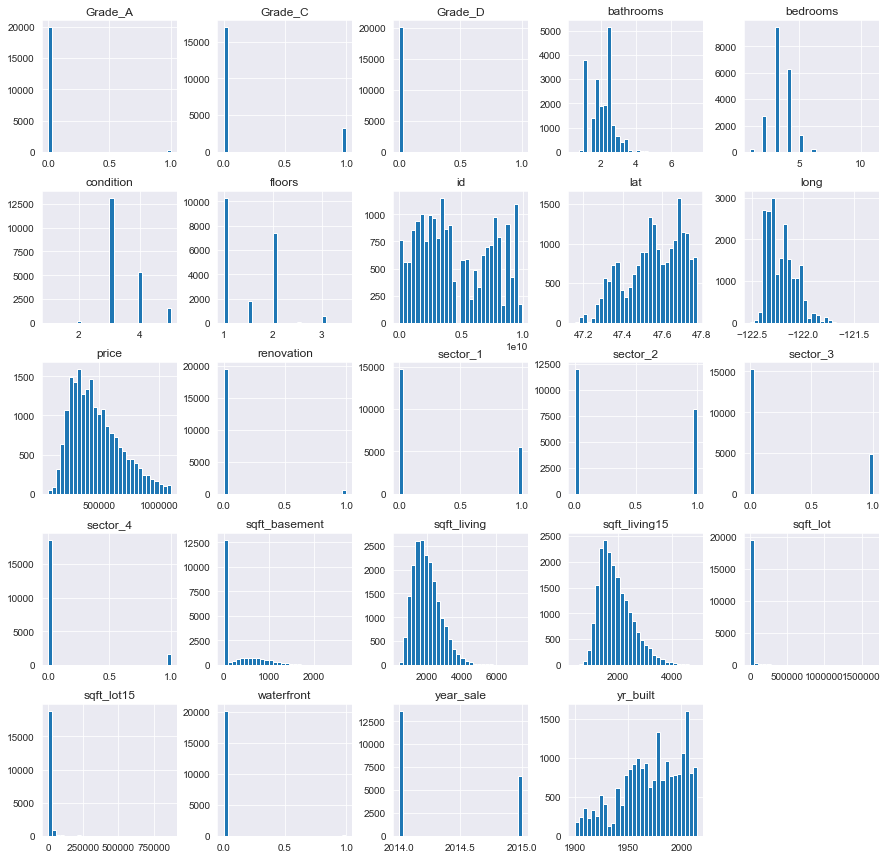

In [76]:
# Plot all features
df_cleaned_1.hist(figsize  = [15, 15],bins=30) 
plt.show()

This model will be recreated in a separate notebook with all the fitting and adjustment explained in detail 